### QUESTION 6-10

In [545]:
library('igraph')
library('Matrix')
library('pracma')
library('readtext')
# library('R.utils')
require('stats')
# require('sets')
library('ggmap')

### QUESTION 6

In [13]:
el=read.csv("uber_edgeList_v1.csv")
uberGraph = graph.data.frame(el, directed = FALSE)

In [14]:
uberGraph
E(uberGraph)[[1]]
# plot(uberGraph, vertex.label=NA, vertex.size = 2)

IGRAPH e10272b UNW- 1887 311812 -- 
+ attr: name (v/c), weight (e/n)
+ edges from e10272b (vertex names):
 [1] 1938--1952 629 --1747 1872--1919 1871--1929 81  --2319 1873--1909
 [7] 232 --809  1729--1891 62  --2423 650 --1829 680 --1529 542 --2251
[13] 604 --1631 1729--660  1329--1917 82  --2421 739 --1736 1192--2021
[19] 550 --2171 1308--1721 1518--1700 176 --2145 889 --1721 536 --2311
[25] 74  --2466 288 --326  169 --2215 99  --2216 549 --1755 646 --1211
[31] 528 --2315 458 --2322 608 --2307 111 --1390 641 --1261 1872--1946
[37] 108 --2357 64  --1454 1729--809  128 --2355 722 --1207 612 --2307
[43] 98  --2226 464 --1074 624 --1058 614 --1531 151 --2395 268 --2341
+ ... omitted several edges

+ 1/311812 edge from e10272b (vertex names):
  tail head tid  hid weight
1 1938 1952   1 1395 571.22

In [20]:
uberGraph.components <- clusters(uberGraph) 

ix <- which.max(uberGraph.components$csize)
uberGraph.giant <- induced.subgraph(uberGraph, which(uberGraph.components$membership == ix))
diameter <- vcount(uberGraph.giant)
normalizedDiameter <- diameter / vcount(uberGraph)

uberGraph.components$csize


[1] 1880    5    2

In [21]:
uberNetwork = uberGraph.giant

cat(paste("\n\nNumber of nodes in G:", vcount(uberNetwork)))
# cat(paste("\nNormalized Size of GCC:", normalizedDiameter))
cat(paste("\nNumber of Edges in G:", ecount(uberNetwork)))
# cat(paste("\nDiameter of GCC is ", diameter(uberGraph.giant)))



Number of nodes in G: 1880
Number of Edges in G: 311802

#### QUESTION 7

In [431]:
geoData=read.csv("geoData_v1.csv", sep='\t')
geoData

id   display_name                                                 
1     1   Sargent Creek, San Ardo                                      
2     2   400 Northumberland Avenue, Redwood Oaks, Redwood City        
3     3   18300 Sutter Boulevard, Morgan Hill                          
4     4   2700 Stoughton Way, Sheffield, Sacramento                    
5     5   3200 Huntsman Drive, Rosemont Park, Sacramento               
6     6   100 Carlsbad Circle, Vacaville                               
7     7   Unnamed Road, Vacaville                                      
8     8   700 Carlsbad Court, Petaluma                                 
9     9   500 Hyde Street, Tenderloin, San Francisco                   
10   10   3200 Nightingale Drive, Modesto                              
11   11   0 Mesa Vista Court, San Ramon                                
12   12   Gate 1 Entrance Road, Calistoga                              
13   13   1400 Eureka Road, Lead Hill, Roseville                       
14   14   900 Crestview Street, Salinas                                
15   15   Unnamed Road, Soledad                                        
16   16   600 9th Street, Pacific Grove                                
17   17   200 Vía Gayuba, Monterey                                     
18   18   3800 Diamond Court, Rocklin                                  
19   19   4500 Galbrath Drive, Kirkland Place, Sacramento              
20   20   900 Sutter Street, Lower Nob Hill, San Francisco             
21   21   3400 Pierce Street, Marina District, San Francisco           
22   22   6400 South Green Valley Road, Cambria                        
23   23   300 East Bell Avenue, Fairfield                              
24   24   400 Cinnamon Way, Suisun City                                
25   25   400 Bowline Drive, Vacaville                                 
26   26   Cornell Street, Sonoma                                       
27   27   Entrada, Santa Rosa                                          
28   28   9300 Lakewood Drive, Windsor                                 
29   29   24800 West Jayne Avenue, Coalinga                            
30   30   2200 Central Avenue, Alameda                                 
⋮    ⋮    ⋮                                                            
2681 2681 Unnamed Road, Beckwourth                                     
2682 2682 Middle Burdell Fire Road, Novato                             
2683 2683 2000 Applegate Road, Atwater                                 
2684 2684 400 3rd Street, Greenfield                                   
2685 2685 9600 Shanks Road, Delhi                                      
2686 2686 8100 Merion Drive, Newark                                    
2687 2687 3900 Seven Trees Boulevard, South San Jose, San Jose         
2688 2688 3800 Valley Vista Road, Walnut Creek                         
2689 2689 1000 Hayes Street, Fairfield                                 
2690 2690 2200 Northridge Drive, Modesto                               
2691 2691 800 Hacienda Way, Millbrae                                   
2692 2692 Parkington Court, Sacramento                                 
2693 2693 2600 Los Amigos Drive, Cordova Meadows, Rancho Cordova       
2694 2694 1900 Buchanan Street, Western Addition, San Francisco        
2695 2695 2200 Rivera Street, Sunset District, San Francisco           
2696 2696 600 West Vine Street, Lodi                                   
2697 2697 200 F Street, Centennial, Redwood City                       
2698 2698 6200 Lonetree Boulevard, Rocklin                             
2699 2699 9400 South Wales Way, Elk Grove                              
2700 2700 300 Ponderosa Road, Avalon, South San Francisco              
2701 2701 6300 Little Uvas Road, Morgan Hill                           
2702 2702 7500 Bernice Avenue, Rohnert Park                            
2703 2703 100 South Washington Street, Downtown Modesto, Modesto       
2704 2704 Forest Route 6N96, Tuolumne County,

In [497]:
getDisplayName = function (nodeid){
    idx = which(geoData$id==nodeid)
    displayName = as.character(geoData$display_name[[idx]])
    return(displayName)
}
getLat = function (nodeid){
    idx = which(geoData$id==nodeid)
    lat = as.double(geoData$location_lon[[idx]])
    return(lat)
}

getLon = function (nodeid){
    idx = which(geoData$id==nodeid)
    lon = as.double(geoData$location_lat[[idx]])
    return(lon)
}
getDisplayName(1)
getLat(1)
getLon(1)

[1] "Sargent Creek, San Ardo"

[1] 36.07163

[1] -120.7887

In [28]:
uberMst = minimum.spanning.tree(uberNetwork)

In [29]:
uberMst
print(vcount(uberMst))
print(ecount(uberMst))

IGRAPH 4a9c711 UNW- 1880 1879 -- 
+ attr: name (v/c), weight (e/n)
+ edges from 4a9c711 (vertex names):
 [1] 828 --1624 1450--1732 721 --455  1484--1550 749 --2022 2349--2620
 [7] 2219--2633 246 --2052 1623--1014 965 --1780 685 --2249 719 --1909
[13] 1117--2119 308 --1847 1530--2214 436 --2173 1283--1887 642 --1689
[19] 1456--410  1524--1523 886 --1030 1848--1849 593 --1062 485 --2534
[25] 1399--2239 2488--2653 2452--314  919 --1911 2149--2523 939 --599 
[31] 1753--974  2110--1170 650 --206  1943--2522 1148--1814 1696--2496
[37] 1752--1453 1748--2510 1255--2161 1093--2611 1759--1762 892 --622 
[43] 2394--2355 827 --2192 897 --2122 1642--1027 1938--2631 2025--2273
+ ... omitted several edges

[1] 1880
[1] 1879


In [398]:
print(E(uberMst)[1:5])
head_of(uberMst, E(uberMst)[[1]])$name
tail_of(uberMst, E(uberMst)[[1]])$name

+ 5/1879 edges from 4a9c711 (vertex names):
[1] 828 --1624 1450--1732 721 --455  1484--1550 749 --2022


[1] "1624"

[1] "828"

In [400]:
max(E(uberNetwork)$weight)
min(E(uberNetwork)$weight)

max(E(uberMst)$weight)
min(E(uberMst)$weight)

[1] 6439.18

[1] 21.9

[1] 801.76

[1] 21.9

In [433]:
for(i in c(1:5)){
#     nodeId = V(uberMst)[[i]]$name
#     cat(nodeId,"\t",getDisplayName(nodeId),"\n")
    headNodeId = as.integer(head_of(uberMst, E(uberMst)[[i]])$name)
    tailNodeId = as.integer(tail_of(uberMst, E(uberMst)[[i]])$name)
    cat(headNodeId," -> ",tailNodeId,"\t",E(uberMst)[[i]]$weight,"\n")
    cat(getDisplayName(headNodeId)," -> ",getDisplayName(tailNodeId),"\n")
    cat("\n")
}
# print(getDisplayName(head_of(uberMst, E(uberMst)[[2]])))
# print(getDisplayName(tail_of(uberMst, E(uberMst)[[2]])))

1624  ->  828 	 158.965 
2900 Roosevelt Lane, Antioch  ->  4200 Amargosa Drive, Antioch 

1732  ->  1450 	 93.535 
0 Longview Drive, Westlake, Daly City  ->  0 Brookhaven Court, Fairmont, Pacifica 

455  ->  721 	 130.305 
3400 Mauricia Avenue, Santa Clara  ->  600 Hobart Terrace, Santa Clara 

1550  ->  1484 	 147.265 
30800 San Clemente Street, Hayward  ->  29300 Lassen Street, Tennyson - Alquire, Hayward 

2022  ->  749 	 87.03 
200 Clearview Drive, Vallejo  ->  1400 Magazine Street, Vallejo 



### QUESTION 8

In [126]:
trianglesVector = triangles(uberNetwork)

In [129]:
length(trianglesVector)

[1] 95036715

In [598]:
startIdx = 3000001
# trianglesVectorSub = as.numeric(trianglesVector[(startIdx):(startIdx-1+(3*2000))])
trianglesVectorSub = as.numeric(trianglesVector)

# trianglesVectorSub
length(trianglesVectorSub)

[1] 95036715

In [608]:
V(uberNetwork)[trianglesVectorSub[90000001],trianglesVectorSub[90000002],trianglesVectorSub[90000003]]$name


[1] "1890" "455"  "1905"

[1] 31678904

In [611]:
nSamples = 1000
sampleRange = length(trianglesVectorSub)/3 - 1
sampleTriangles = sample(1:sampleRange, nSamples, replace=F)
# sampleTriangles = c(0:999)
satisfyCount = 0
for(idx in sampleTriangles){
    v1Id = trianglesVectorSub[(idx*3 + 1)]
    v2Id = trianglesVectorSub[(idx*3 + 2)]
    v3Id = trianglesVectorSub[(idx*3 + 3)]
    
    v1 = V(uberNetwork)[v1Id]$name
    v2 = V(uberNetwork)[v2Id]$name
    v3 = V(uberNetwork)[v3Id]$name

#     vNames = c(as.character(v1), as.character(v2), as.character(v2), as.character(v3), as.character(v3), as.character(v1))
    vNames = c(v1, v2, v2, v3, v3, v1)

#     print(vNames)
    eIds = get.edge.ids(uberNetwork, vNames)
#     print(E(uberNetwork)[eIds])
    eWeights = E(uberNetwork)[eIds]$weight
#     print(eWeights)
#     cat("\n",eWeights[[1]],"  ",eWeights[[2]],"  ", eWeights[[3]],"\n")
#     satisfy=TRUE
# #     for(i in c(1:3,1)){
# #         if(eWeights[[i]])
        
# #     }
#     if (eWeights[[1]] + eWeights[[2]] < eWeights[[3]])
#         satisfy = FALSE
#     if (eWeights[[2]] + eWeights[[3]] < eWeights[[1]])
#         satisfy = FALSE
#     if (eWeights[[1]] + eWeights[[3]] < eWeights[[2]])
#         satisfy = FALSE
#     print(satisfy)
#     if(satisfy)
#         satisfyCount = satisfyCount + 1
    
#     satisfy=FALSE
    if(eWeights[[1]] + eWeights[[2]] >= eWeights[[3]])
        if(eWeights[[2]] + eWeights[[3]] >= eWeights[[1]])
            if(eWeights[[1]] + eWeights[[3]] >= eWeights[[2]])
                satisfyCount = satisfyCount + 1
    
}
cat(satisfyCount," / ",nSamples,"\n")
satisfyPercent = satisfyCount*100/nSamples
cat(satisfyPercent)


942  /  1000 
94.2

In [175]:
abc = c(as.character(2))
abc
V(uberNetwork)['2']
V(uberNetwork)[[2]]
V(uberNetwork)[abc]
V(uberNetwork)[[abc]]
a=TRUE
a
b = c(1:3,1)
b

[1] "2"

+ 1/1880 vertex, named, from 4b5b61c:
[1] 2

+ 1/1880 vertex, named, from 4b5b61c:
  name
2  629

+ 1/1880 vertex, named, from 4b5b61c:
[1] 2

+ 1/1880 vertex, named, from 4b5b61c:
    name
523    2

[1] TRUE

[1] 1 2 3 1

In [121]:
eIds = get.edge.ids(uberNetwork, c('234','1938','1938','2631','2631','234'))
print(eIdss)
print(E(uberNetwork)[eIds])
print(E(uberNetwork)[eIds]$weight)


[1] 279730   7174 270003
+ 3/311802 edges from 4b5b61c (vertex names):
[1] 1938--234  1938--2631 234 --2631
[1] 3334.930  109.625 3430.710


In [402]:
print(E(uberNetwork)[[7174]])

+ 1/311802 edge from 4b5b61c (vertex names):
     tail head tid  hid  weight
7174 1938 2631   1 1796 109.625


### QUESTION 9

In [244]:
t1 = make_tree(9)
t1

IGRAPH fca5420 D--- 9 8 -- Tree
+ attr: name (g/c), children (g/n), mode (g/c)
+ edges from fca5420:
[1] 1->2 1->3 2->4 2->5 3->6 3->7 4->8 4->9

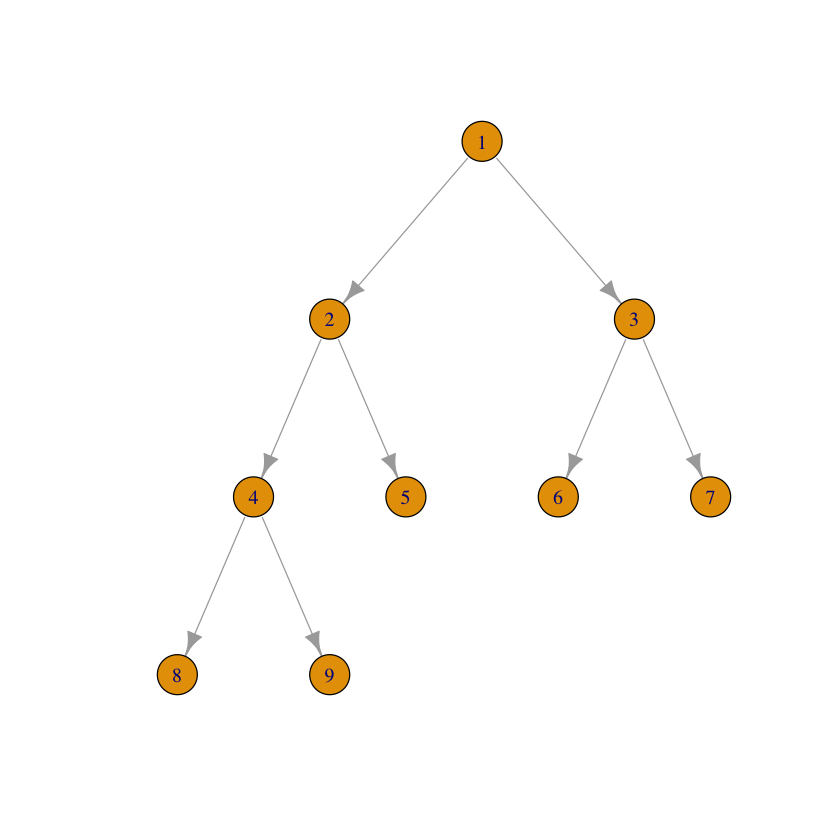

In [252]:
plot(t1, layout = layout.reingold.tilford(t1, root=1))

In [253]:
## A graph with two separate trees
dfs(t1, root=1, unreachable = FALSE, order = TRUE)$order

+ 9/9 vertices, from fca5420:
[1] 1 2 4 8 9 5 3 6 7

IGRAPH 4a9c711 UNW- 1880 1879 -- 
+ attr: name (v/c), weight (e/n)
+ edges from 4a9c711 (vertex names):
 [1] 828 --1624 1450--1732 721 --455  1484--1550 749 --2022 2349--2620
 [7] 2219--2633 246 --2052 1623--1014 965 --1780 685 --2249 719 --1909
[13] 1117--2119 308 --1847 1530--2214 436 --2173 1283--1887 642 --1689
[19] 1456--410  1524--1523 886 --1030 1848--1849 593 --1062 485 --2534
[25] 1399--2239 2488--2653 2452--314  919 --1911 2149--2523 939 --599 
[31] 1753--974  2110--1170 650 --206  1943--2522 1148--1814 1696--2496
[37] 1752--1453 1748--2510 1255--2161 1093--2611 1759--1762 892 --622 
[43] 2394--2355 827 --2192 897 --2122 1642--1027 1938--2631 2025--2273
+ ... omitted several edges

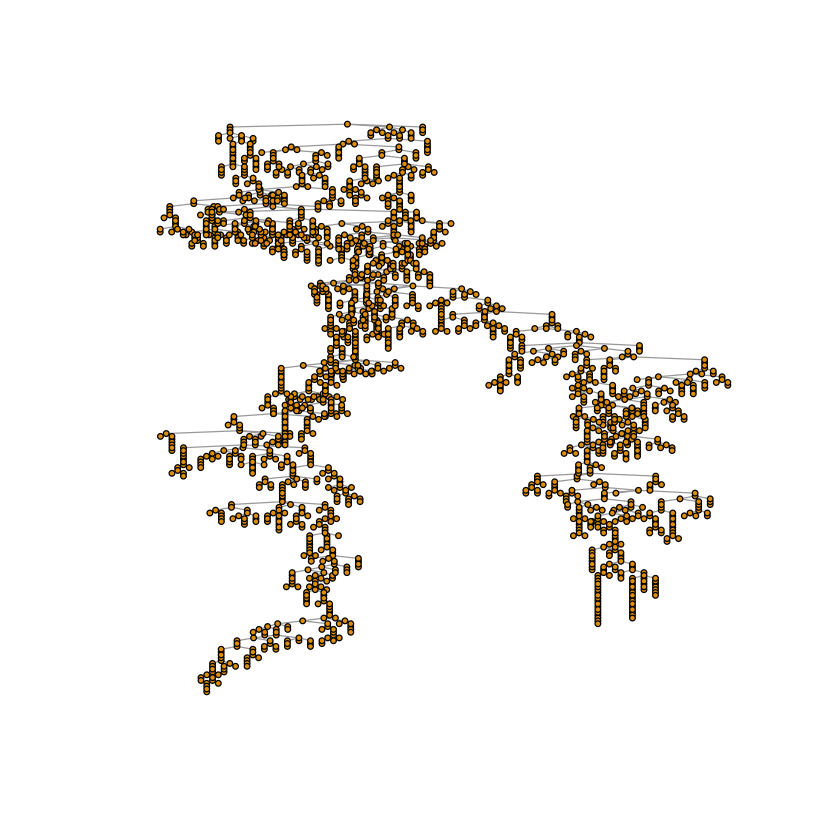

In [262]:
uberMst
plot(uberMst, layout = layout.reingold.tilford(uberMst, root=1), vertex.size=2, vertex.label=NA)

In [315]:
uberDfs = dfs(uberMst, root=1, unreachable = TRUE, order = TRUE)$order

In [316]:
uberDfs

+ 1880/1880 vertices, named, from 4a9c711:
   [1] 1938 1241 2514 1388 746  876  187  2488 1873 251  309  565  157  1407
  [15] 38   1409 3    567  1396 2234 1397 1398 1408 2516 2527 2238 1965 1966
  [29] 568  747  1896 88   1399 569  2239 2701 1444 344  2108 2109 2562 1156
  [43] 1157 159  783  2506 204  1153 2106 247  1152 846  2104 896  2265 2017
  [57] 1162 2477 2100 158  2101 14   2257 1158 2103 1144 2627 784  377  1182
  [71] 503  788  2476 2102 1159 1160 2640 2564 1154 1155 2271 2113 2655 2662
  [85] 1174 948  2270 2269 69   787  378  884  2507 2123 160  2122 897  2259
  [99] 17   2110 1170 2478 2563 2015 847  2479 786  1173 1172 2111 16   2112
 [113] 2258 776  1171 1161 2124 2125 2107 1972 1429 1978 1426 2390 1971 215 
 [127] 1440 240  1441 1979 1813 1809 172  2243 1808 2529 1807 1806 365  1432
+ ... omitted several vertices

In [557]:
for(idx in c(1:length(uberDfs))){
    nodeid = uberDfs[idx]$name
#     cat(nodeid,"\t",getDisplayName(nodeid),"\n")
    cat(getLat(nodeid),"\t",getLon(nodeid),"\n")
}

37.29051 	 -121.8217 
37.28098 	 -121.8145 
37.27305 	 -121.8169 
37.26706 	 -121.8143 
37.26404 	 -121.8252 
37.27214 	 -121.8359 
37.26998 	 -121.846 
37.2629 	 -121.8049 
37.25525 	 -121.768 
37.25095 	 -121.7895 
37.23474 	 -121.7627 
37.22992 	 -121.7718 
37.22306 	 -121.7647 
37.17671 	 -121.7334 
37.20584 	 -121.4812 
37.15503 	 -121.621 
37.15048 	 -121.6602 
37.1348 	 -121.6437 
37.11151 	 -121.6305 
37.09899 	 -121.6373 
37.1163 	 -121.6549 
37.12484 	 -121.6645 
37.11864 	 -121.6734 
37.13492 	 -121.6027 
37.10343 	 -121.5686 
37.06385 	 -121.6059 
37.00969 	 -121.5163 
37.01559 	 -121.5713 
37.02568 	 -121.5839 
37.0252 	 -121.5913 
37.03027 	 -121.6292 
37.00267 	 -121.5655 
36.98653 	 -121.5713 
37.0055 	 -121.578 
36.98129 	 -121.5901 
37.0551 	 -121.7128 
36.88836 	 -121.3398 
36.83294 	 -121.4911 
36.84443 	 -121.6935 
36.8166 	 -121.6752 
36.79605 	 -121.6225 
36.72871 	 -121.6516 
36.72598 	 -121.6546 
36.71747 	 -121.6903 
36.70365 	 -121.6604 
36.69349 	 -121.6515 

In [419]:
are.connected(uberNetwork, '5', '6')
are.connected(uberNetwork, '2', '3')

print(E(uberNetwork, P=c('1938','1241')))
print(E(uberNetwork)[[E(uberNetwork, P=c('1938','1241'))]])
print(E(uberNetwork, P=c('1938','1241'))$weight)

distances(uberNetwork, v = '1938', to = '1241', weights = NULL)
are.connected(uberNetwork, '2265', '2017')
distances(uberNetwork, v = '2265', to = '2017')
distances(uberNetwork, v = '2265', to = '2017')[1]



[1] TRUE

[1] FALSE

+ 1/311802 edge from 4b5b61c (vertex names):
[1] 1938--1241
+ 1/311802 edge from 4b5b61c (vertex names):
      tail head tid hid weight
64492 1938 1241   1 473 132.59
[1] 132.59


1241  
1938 132.59

[1] FALSE

2017   
2265 742.415

[1] 742.415

In [428]:
tspCost=0
noEdgeCount=0
for(gId in c(1:(length(uberDfs)-1))){
    sourceNodeId = uberDfs[gId]$name
    destNodeId = uberDfs[gId+1]$name
    if(are.connected(uberNetwork, sourceNodeId, destNodeId)){
        eWt = E(uberNetwork, P=c(sourceNodeId, destNodeId))$weight
        tspCost = tspCost + eWt
    }
    else{
        # shortest path method
        noEdgeCount = noEdgeCount + 1
        pathWt = distances(uberNetwork, v = sourceNodeId, to = destNodeId)[1]
        tspCost = tspCost + pathWt
#         cat(sourceNodeId, destNodeId,pathWt,"\n")


    }
#     cat(sourceNodeId, destNodeId, eWt,"\n")

}
print(tspCost)
print(noEdgeCount)

[1] 466489.6
[1] 57


In [424]:
# cost of MST
mstCost = 0
for(i in c(1:length(E(uberMst)))){
    eWt = E(uberMst)[[i]]$weight
    mstCost = mstCost + eWt
}
print(mstCost)
print(2*mstCost)


[1] 279408.2
[1] 558816.4


In [430]:
print(mstCost)
print(tspCost)
print(2*mstCost)
print(tspCost/mstCost)

[1] 279408.2
[1] 466489.6
[1] 558816.4
[1] 1.669563


### QUESTION 10

Done Above!

### QUESTION 11

In [449]:
uberNetworkNodes=as.integer(V(uberNetwork)$name)
uberNetworkNodes

[1] 1938  629 1872 1871   81 1873  232 1729   62  650  680  542  604  660
  [15] 1329   82  739 1192  550 1308 1518  176  889  536   74  288  169   99
  [29]  549  646  528  458  608  111  641  108   64  809  128  722  612   98
  [43]  464  624  614  151  268  644  649  744  394  434  234  224  554  289
  [57]  222  610  544  284  315  829  251  388 1755 1748  954 1386 1726 1296
  [71] 1749  338 1745  613  175  535 1451  647   65  387  859 1739 1808  818
  [85] 1692  738  695  685  682  817  339  605  153  609  264  272 1287  397
  [99] 1409 1437 1257 1471  131 1571  347 1271  822 1359  422  152 2113  380
 [113]  832  370  742 2049  277 1258  369 1297   52 2110 1269  385 1438 1277
 [127]  165 2111  123 1259  446  445  285   69  478 1032  431  602  322  286
 [141]  885  595  452  225  676  155  447  194  665  334  209 1090 1691  675
 [155]  448  597   42  950  100  221  417 1064   60  235  702 1284  617   80
 [169] 1332 2322 2202  919 2132  827  469   25  888  659  345  594  929  627
 [183]   58 1852 1850   38 1526  907  927 1736   91 1510 1838 1361 1551 1511
 [197] 1921 1911 1431 1331 1731 1721 1381    9 1597   11  104  935  119 1933
 [211]   47  125  875  828  866  136  184   78  886  541   79  154 1026  537
 [225]  468   96 1063 1283 1310 1220 1300  473   86 1448  876  697  415  698
 [239] 1519  623 1449  699 1528 2025 1080  764 1120   92  457  615 1439 1060
 [253] 1452 1907  858  906  867   87  964  534  467  814  563 1260  908  963
 [267] 1446  532 1462  207  117  663  904 1232 1282  309  969 1222 1978 1465
 [281] 1298 1252 1262  296 2478 1447 1255 2378  193 1305  283  583  299  648
 [295] 1759 1695 1773  217  172  218 1206  103 1209 1688  642  938 1687  607
 [309] 1875 1895 1886 1896 1869  548 1698 1455  241 1516 1504   20  460 1058
 [323]  860 1587  557 1577 2206   90  920   61  843  939 1021 1028 2452  984
 [337]  830  967  968 1512  864 1087  986  930 1068 1097 1461 1524  308  138
 [351]  826  805 2236  957  438 1086  965 1639 1781  892 1029 2324 1629  743
 [365]  433 1559  443  983 1649 2225 1246  916 1106  677   37  977 1903  167
 [379] 1686 1274 1154 1304 1674 1594 1743 1690 1830 1555 1234 1564  566  346
 [393]  556  436 1254  716 1936 1079  746 1604 1202  306  815  905 1605 1270
 [407] 1334  915  546  725 1703 1660 2131 2120 1706  471 1656 2121 1261  724
 [421] 1470 1251 1704  718 1303 1302 2520 2519 1237  945 1182 1024  975 1025
 [435] 1450 1046  275  611 1589 1700 1723 2318 1047  304 2199  465  740 1530
 [449]  661  561 1596  721 1299 1233  107  651 1235  762 1783 1337 2117 1210
 [463] 1245  917 1625 1036 1248 2443 1031  741 1236 1173 1241  174 1689  242
 [477]  303 1276  723  389 1583 1705 1584  290 1499  210  206  652 1574 1556
 [491] 1557 1121 1043  216 1536 2269 2514 1225 1915 1702 2505 1825  390  391
 [505] 1740 1751 1750 1655  678 2512 1694 1247  720 1541 1547  600 1467 1016
 [519] 1744 1498  530   43    2 1030  113 2403  472  187 1293  463  645  455
 [533]  562  466  808  571 1752 1753 1775  598 2526  599  638   44 1243 1244
 [547]  212 1181 1119  127 1609  382 1084  628  558 1747 1617 2362  195 1069
 [561]   56 1265 1746 1730 1725  488 1275 1565 1806   21 1085   41  454  173
 [575] 1059  643 1595 1768 1015  768 1273  157  142  653  976   46  618  280
 [589] 2353  102  603  132   27 2263  791 1081  437  171   57  553 1539  475
 [603]  435  302  323 1762 1454  893  146 1546 2069 2504 1286 1724 1623 2215
 [617] 1754 2104  238 2363  314 1292  253  321 1735   63 1633  621 1464  170
 [631] 1484  918  749  311  456  416  326  751  816  798  329  980   75 1630
 [645] 1650 2394 1095 1088  940 1732  823 1067 1741  757 2002  377  116  516
 [659] 1722   13 1654 2134  687 1912  487 2115 1904 1761 2118 2349 2219 2209
 [673] 2145 1733 1728 2304 1338  181 1774  891  756  246 2308 1330 1113 1053
 [687]  352 1049 1019 2056 1514 2223 2420 1066 1620 1834 1520 1720  820   94
 [701]  696  719  948 1426  495 1710 1014 1779 1070 1309  324 1764  684  616
 [715]  897  191    7  985 1211 1472  196 1250  565 1322 1697 1628 1892 1924

In [451]:
write.csv(uberNetworkNodes, "uberNetworkNodes_v1.csv", row.names=FALSE, col.names=FALSE)


Warning message in write.csv(uberNetworkNodes, "uberNetworkNodes_v1.csv", row.names = FALSE, :
“attempt to set 'col.names' ignored”

In [461]:
which(V(uberNetwork)$name=='2710')

integer(0)

In [462]:
flowEl=read.csv("flow_edgeList_v1.csv")
flowGraph = graph.data.frame(flowEl, directed = FALSE)

In [887]:
vcount(flowGraph)
ecount(flowGraph)
flowGraph


[1] 1880

[1] 5627

IGRAPH 8766ee2 UNW- 1880 5627 -- 
+ attr: name (v/c), weight (e/n), capacity (e/n), speed (e/n)
+ edges from 8766ee2 (vertex names):
 [1] 806 --2073 1177--2073 806 --1177 1444--2017 1444--583  583 --2017
 [7] 1177--2383 1177--583  583 --2383 1171--2478 1955--2478 1171--1955
[13] 1442--2327 342 --2327 1442--342  1442--2383 2327--2383 38  --1965
[19] 1444--38   1444--1965 577 --2073 806 --577  896 --1162 896 --2017
[25] 1162--2017 2112--2241 1171--2112 1171--2241 1763--2458 1955--1763
[31] 1955--2458 1720--2504 1720--1732 1732--2504 234 --2629 234 --1447
[37] 1447--2629 800 --2005 806 --800  806 --2005 1995--2005 800 --1995
[43] 587 --2005 806 --587  577 --2026 806 --2026 1965--2364 1444--2364
+ ... omitted several edges

In [475]:
E(flowGraph)[1]
head_of(flowGraph, E(flowGraph)[1])$name
tail_of(flowGraph, E(flowGraph)[1])$name
# if(are.connected(uberNetwork, sourceNodeId, destNodeId)){
#     eWt = E(uberNetwork, P=c(sourceNodeId, destNodeId))$weight
#     tspCost = tspCost + eWt
# }
# else{
#     # shortest path method
#     noEdgeCount = noEdgeCount + 1
#     pathWt = distances(uberNetwork, v = sourceNodeId, to = destNodeId)[1]
#     tspCost = tspCost + pathWt
# #         cat(sourceNodeId, destNodeId,pathWt,"\n")


# }

+ 1/5627 edge from 8766ee2 (vertex names):
[1] 806--2073

[1] "2073"

[1] "806"

In [680]:
caliMap = get_googlemap(center = c(mean(plotGeodataDf$lonList), mean(plotGeodataDf$latList)), 
              zoom = 8,
              maptype = "roadmap") %>% ggmap()

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=37.621766,-121.810879&zoom=8&size=640x640&scale=2&maptype=roadmap&sensor=false


Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=37.7351,-122.3136&zoom=10&size=640x640&scale=2&maptype=roadmap&sensor=false


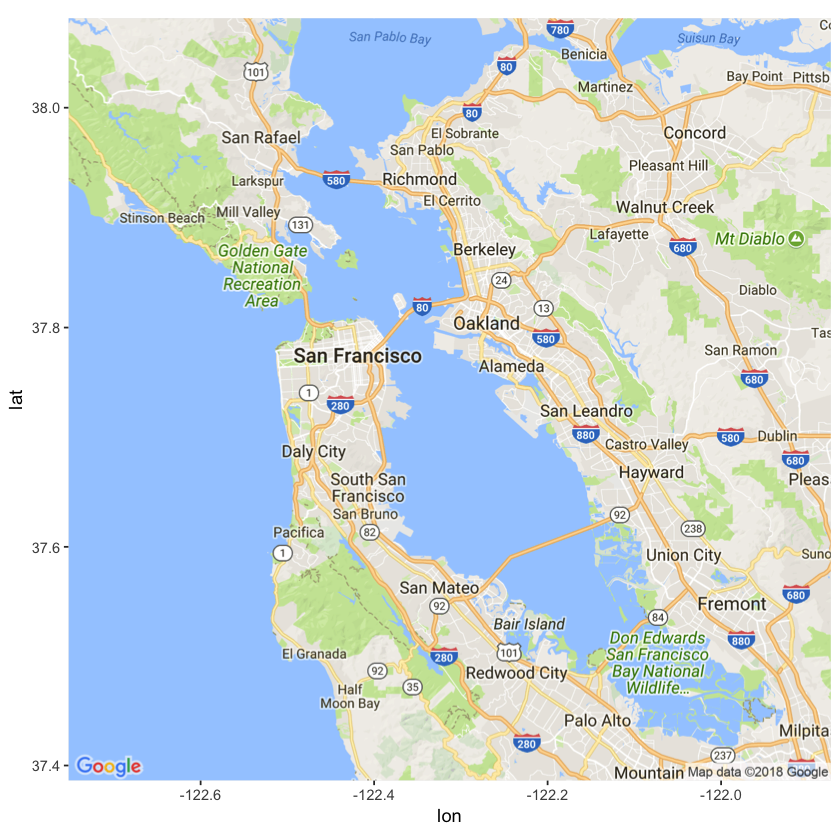

In [854]:
caliMapBridgesZoomed = get_googlemap(center = c(mean(bridgeLonList), mean(bridgeLatList)), 
              zoom = 10,
              maptype = "roadmap") %>% ggmap()
caliMapBridgesZoomed

In [709]:
edgeIdList = c()
nodeIdList = c()
latList = c()
lonList = c()
nEdges = ecount(flowGraph)
# nEdges = 1000
for(ei in 1:nEdges){
    sourceNodeName = head_of(flowGraph, E(flowGraph)[ei])$name
    destNodeName =  tail_of(flowGraph, E(flowGraph)[ei])$name
    
    edgeIdList = c(edgeIdList, ei, ei)
    nodeIdList = c(nodeIdList, sourceNodeName, destNodeName)
    latList = c(latList, getLat(sourceNodeName), getLat(destNodeName))
    lonList = c(lonList, getLon(sourceNodeName), getLon(destNodeName))
}
plotGeodataDf = data.frame(edgeIdList, nodeIdList, latList, lonList)
# plotGeodataDf
# E(flowGraph)[1:10]

In [710]:
nrow(plotGeodataDf)
ncol(plotGeodataDf)

[1] 11254

[1] 4

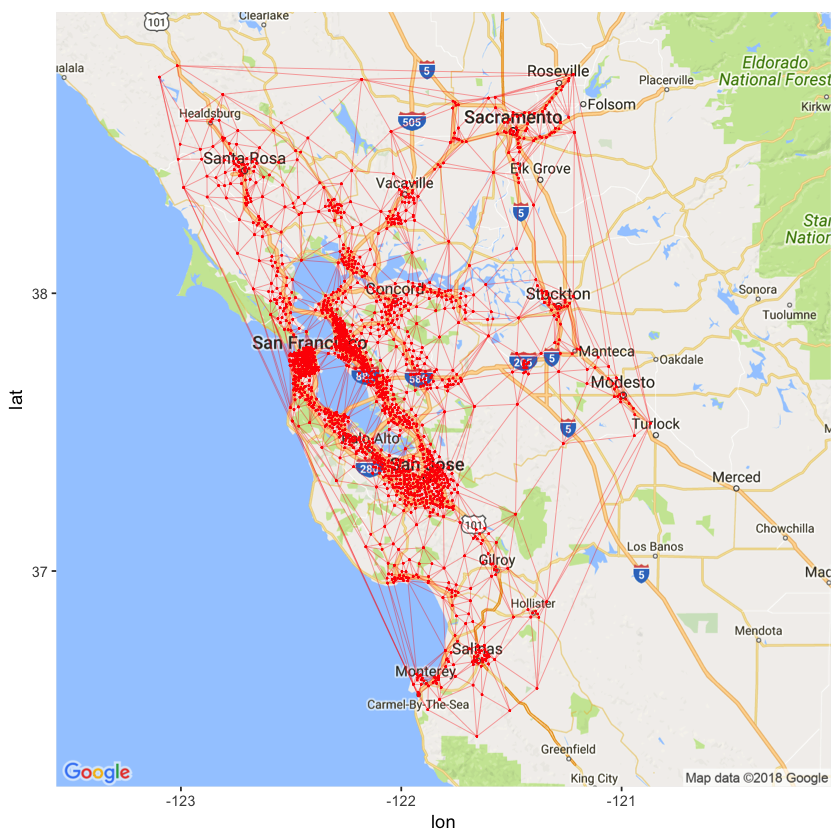

In [785]:
caliMap +
geom_point(data = plotGeodataDf, mapping = aes(x = lonList, y = latList), color = "red", size = 0.01) +
geom_path(data = plotGeodataDf,
    aes(x = lonList, y = latList, group = edgeIdList),  colour = "red",
    size = 0.1, alpha = 1.0, lineend = "round")
#   ) + 
# geom_path(data = plotBridgesDf,
#     aes(x = bridgeLonList, y = bridgeLatList, group = bridgeEdgeIdList),  
#     colour = "black", size = 0.5, alpha = 1.0, lineend = "round"
#   )

Warning message:
“Removed 5511 rows containing missing values (geom_point).”Warning message:
“Removed 131 rows containing missing values (geom_path).”

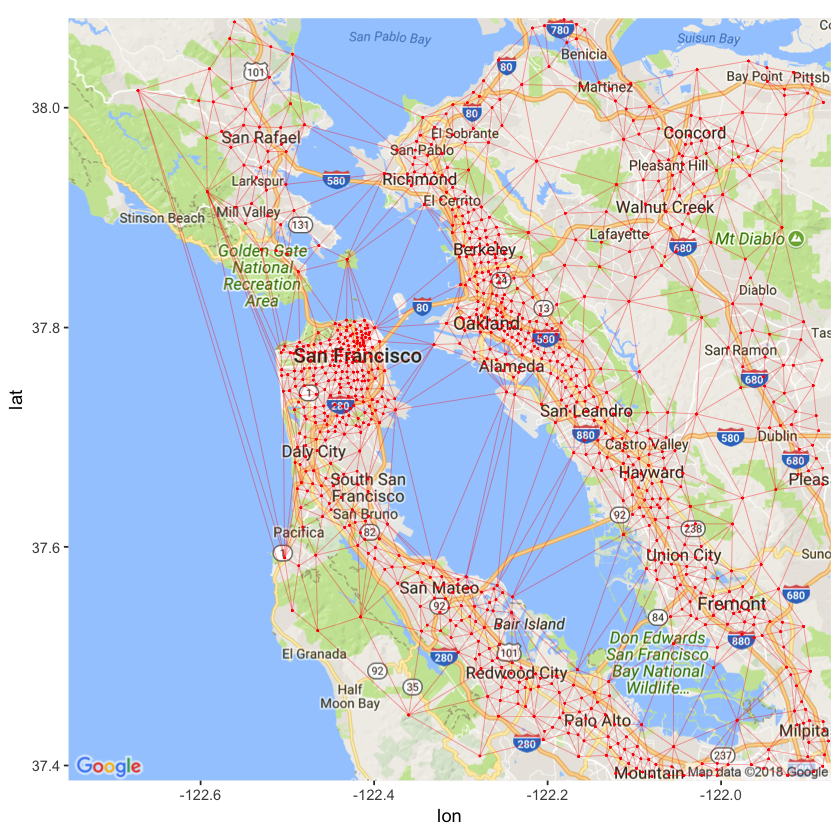

In [894]:
caliMapBridgesZoomed +
geom_point(data = plotGeodataDf, mapping = aes(x = lonList, y = latList), color = "red", size = 0.01) +
geom_path(data = plotGeodataDf,
    aes(x = lonList, y = latList, group = edgeIdList),  colour = "red",
    size = 0.1, alpha = 1.0, lineend = "round"
          )

In [483]:
noFlowEdgeCount=0
for(ei in 1:length(E(flowGraph))){
    sourceNodeName = head_of(flowGraph, E(flowGraph)[ei])$name
    destNodeName =  tail_of(flowGraph, E(flowGraph)[ei])$name
    if(are.connected(uberNetwork, sourceNodeName, destNodeName)){
        eWt = E(uberNetwork, P=c(sourceNodeName, destNodeName))$weight
        E(flowGraph)[ei]$weight = eWt
    }
    else{
        # shortest path method
        noFlowEdgeCount = noFlowEdgeCount + 1
        pathWt = distances(uberNetwork, v = sourceNodeName, to = destNodeName)[1]
        E(flowGraph)[ei]$weight = pathWt
    }
#     print(E(flowGraph)[[ei]])
}
print(noFlowEdgeCount)

[1] 360


In [521]:
calculateCapacity = function (sourceNodeName, destNodeName, travelTime){
    sourceLoc = c(getLat(sourceNodeName), getLon(sourceNodeName))
    destLoc = c(getLat(destNodeName), getLon(destNodeName))
    
    locDistance = haversine(sourceLoc, destLoc) * 0.62137
    carSpeed = locDistance/travelTime
    
    capacity = 2 * 3600 / (2 + (0.003 / carSpeed))
    
    return(as.double(capacity))
}

In [725]:
calculateSpeed = function (sourceNodeName, destNodeName, travelTime){
    sourceLoc = c(getLat(sourceNodeName), getLon(sourceNodeName))
    destLoc = c(getLat(destNodeName), getLon(destNodeName))
    
    locDistance = haversine(sourceLoc, destLoc) * 0.62137
    carSpeed = locDistance/travelTime
    
    return(as.double(carSpeed))
}

In [522]:
for(ei in 1:length(E(flowGraph))){
# for(ei in 1:1))
    sourceNodeName = head_of(flowGraph, E(flowGraph)[ei])$name
    destNodeName =  tail_of(flowGraph, E(flowGraph)[ei])$name
    travelTime = E(flowGraph)[ei]$weight

    E(flowGraph)[[ei]]$capacity = calculateCapacity(sourceNodeName, destNodeName, travelTime)
    
#     add_edges(flowGraph,c(destNodeName, sourceNodeName), color = "green")

#     print(E(flowGraph)[[ei]])
#     break
}

E(flowGraph)[[1879]]

+ 1/5627 edge from 8766ee2 (vertex names):
     tail head tid hid weight capacity
1879 1730  915 303 634 368.29 2745.554

In [724]:
# V(flowGraph)['1880']
# E(flowGraph, P=c('1880', '775'))
max(E(flowGraph)$capacity)
min(E(flowGraph)$capacity)
mean(E(flowGraph)$capacity)
std(E(flowGraph)$capacity)

E(flowGraph)[[1:10]]

[1] 3565.103

[1] 635.712

[1] 2754.035

[1] 353.2562

+ 10/5627 edges from 8766ee2 (vertex names):
   tail head tid  hid   weight capacity
1   806 2073   1 1608 5893.175 3011.166
2  1177 2073   2 1608 8068.775 3199.968
3   806 1177   1    2 3757.410 3246.445
4  1444 2017   3   25 1726.240 3219.031
5  1444  583   3    4 6361.930 3037.476
6   583 2017   4   25 8044.615 3083.956
7  1177 2383   2  986 2582.250 2830.051
8  1177  583   2    4 9115.070 3116.493
9   583 2383   4  986 8995.660 3046.244
10 1171 2478   5 1609  572.220 2817.385

In [732]:
# CALCULATE SPEED

nEdges = length(E(flowGraph))
# nEdges = 10
for(ei in 1:nEdges){
    sourceNodeName = head_of(flowGraph, E(flowGraph)[ei])$name
    destNodeName =  tail_of(flowGraph, E(flowGraph)[ei])$name
    travelTime = E(flowGraph)[ei]$weight
    
    E(flowGraph)[[ei]]$speed = calculateSpeed(sourceNodeName, destNodeName, travelTime)
}

E(flowGraph)[[1879]]

+ 1/5627 edge from 8766ee2 (vertex names):
     tail head tid hid weight capacity       speed
1879 1730  915 303 634 368.29 2745.554 0.004819882

In [883]:
maxSpeed = max(E(flowGraph)$speed)
minSpeed = min(E(flowGraph)$speed)
meanSpeed = mean(E(flowGraph)$speed)
stdSpeed = std(E(flowGraph)$speed)

maxSpeed
minSpeed
meanSpeed
stdSpeed
E(flowGraph)[[1:10]]

[1] 0.1532412

[1] 0.0003216854

[1] 0.006582799

[1] 0.00548235

+ 10/5627 edges from 8766ee2 (vertex names):
   tail head tid  hid   weight capacity       speed
1   806 2073   1 1608 5893.175 3011.166 0.007670659
2  1177 2073   2 1608 8068.775 3199.968 0.011998924
3   806 1177   1    2 3757.410 3246.445 0.013773439
4  1444 2017   3   25 1726.240 3219.031 0.012674371
5  1444  583   3    4 6361.930 3037.476 0.008099592
6   583 2017   4   25 8044.615 3083.956 0.008964232
7  1177 2383   2  986 2582.250 2830.051 0.005513450
8  1177  583   2    4 9115.070 3116.493 0.009668405
9   583 2383   4  986 8995.660 3046.244 0.008251585
10 1171 2478   5 1609  572.220 2817.385 0.005399948

### QUESTION 13

In [963]:
# 2607	100 Campus Drive, Stanford	-122.175982222	37.4296858889
# 1968	700 Meder Street, Santa Cruz	-122.064561811	36.9741688108

maxFlowRes = max_flow(flowGraph, '2607', '1968', capacity = NULL)
maxFlowRes$value

[1] 14747.97

In [964]:
edge_disjoint_paths(flowGraph, '2607', '1968')

[1] 5

In [967]:
maxFlowEdgeFlow[[12]]
length(maxFlowEdgeFlow)


[1] -1197.698

[1] 5627

In [920]:
maxFlowEdgeFlow = maxFlowRes$flow

flowEdgeIdList = c()
flowNodeIdList = c()
flowLatList = c()
flowLonList = c()
nEdges = length(maxFlowEdgeFlow)
# nEdges = 1000
for(ei in 1:nEdges){
    if(maxFlowEdgeFlow[[ei]] != 0){
        sourceNodeName = head_of(flowGraph, E(flowGraph)[ei])$name
        destNodeName =  tail_of(flowGraph, E(flowGraph)[ei])$name

        flowEdgeIdList = c(flowEdgeIdList, ei, ei)
        flowNodeIdList = c(flowNodeIdList, sourceNodeName, destNodeName)
        flowLatList = c(flowLatList, getLat(sourceNodeName), getLat(destNodeName))
        flowLonList = c(flowLonList, getLon(sourceNodeName), getLon(destNodeName))
    }
}
plotFlowDf = data.frame(flowEdgeIdList, flowNodeIdList, flowLatList, flowLonList)
nrow(plotFlowDf)

[1] 130

In [899]:
caliMapStanSanta = get_googlemap(center = maxFlowMapCenter, 
              zoom = 10,
              maptype = "roadmap") %>% ggmap()

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=37.201927,-122.120272&zoom=10&size=640x640&scale=2&maptype=roadmap&sensor=false


Warning message:
“Removed 97 rows containing missing values (geom_path).”Warning message:
“Removed 3 rows containing missing values (geom_path).”

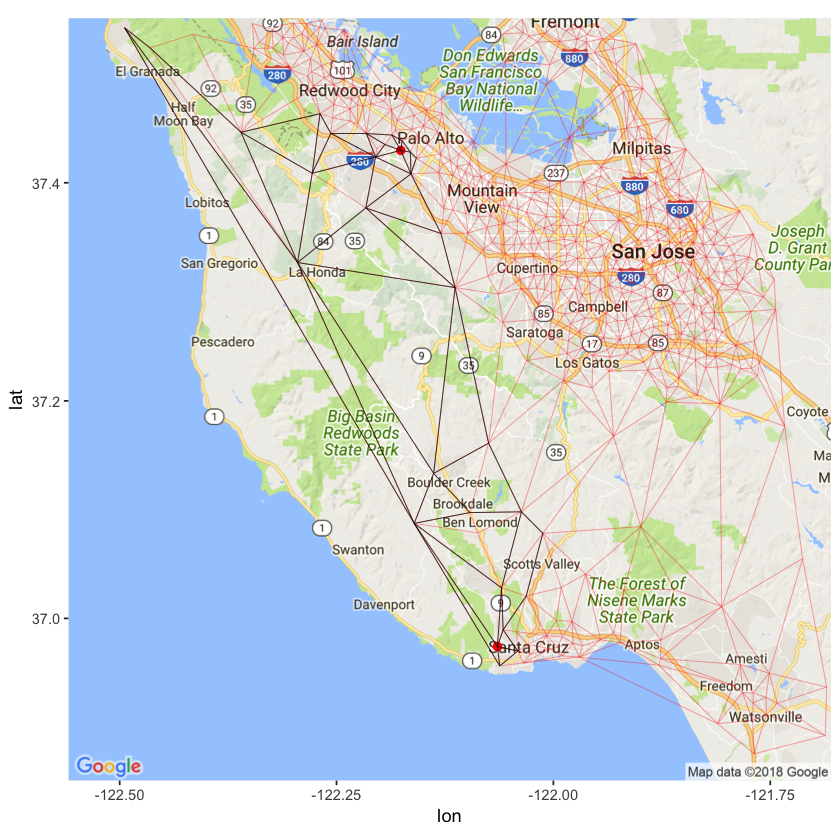

In [959]:
stanfordLon = -122.175982222
stanfordLat = 37.4296858889

santaCruzLon = -122.064561811
santaCruzLat = 36.9741688108
stanSantaLonList = c(stanfordLon, santaCruzLon)
stanSantaLatList = c(stanfordLat, santaCruzLat)
stanSantaDf = data.frame(stanSantaLonList, stanSantaLatList)
maxFlowMapCenter = c(mean(stanSantaLonList),mean(stanSantaLatList))

caliMapStanSanta +
geom_point(data = stanSantaDf, mapping = aes(x = stanSantaLonList, y = stanSantaLatList), color = "red", size = 2) +
geom_path(data = plotGeodataDf,
    aes(x = lonList, y = latList, group = edgeIdList),  colour = "red",
    size = 0.1, alpha = 1.0, lineend = "round"
          ) + 
geom_path(data = plotFlowDf,
    aes(x = flowLonList, y = flowLatList, group = flowEdgeIdList),  colour = "black",
    size = 0.2, alpha = 1, lineend = "round"
          )

### QUESTION 14

In [877]:
max(E(uberNetwork)$weight)
min(E(uberNetwork)$weight)

maxTime = max(E(flowGraph)$weight)
minTime = min(E(flowGraph)$weight)
meanTime = mean(E(flowGraph)$weight)
stdTime = std(E(flowGraph)$weight)

maxTime
minTime
meanTime
stdTime

[1] 6439.18

[1] 21.9

[1] 10265.63

[1] 21.9

[1] 364.1976

[1] 686.2601

In [866]:
flowGraphDefoliated = induced_subgraph(flowGraph, V(flowGraph))
vcount(flowGraphDefoliated)
ecount(flowGraphDefoliated)
E(flowGraphDefoliated)[[1]]

[1] 1880

[1] 5627

+ 1/5627 edge from 7bf7b37 (vertex names):
  tail head tid  hid   weight capacity       speed
1  806 2073   1 1608 5893.175 3011.166 0.007670659

In [867]:
graphSize = ecount(flowGraphDefoliated)
delCount = 0
delSeq = c()
for(ei in 1:graphSize){
    wt = E(flowGraphDefoliated)[[ei]]$weight
    # 6439.18
    if(wt > (meanTime + stdTime)){
        sourceNodeName = head_of(flowGraph, E(flowGraph)[ei])$name
        destNodeName =  tail_of(flowGraph, E(flowGraph)[ei])$name
        delSeq = c(delSeq, ei)
#         delete_edges(flowGraphDefoliated, cat(sourceNodeName,'|',destNodeName))
        delCount = delCount +1
    }
}
flowGraphDefoliated = delete_edges(flowGraphDefoliated, delSeq)

In [939]:
print(delCount)
vcount(flowGraphDefoliated)
ecount(flowGraphDefoliated)

[1] 262


[1] 1880

[1] 5365

In [869]:
edgeIdList = c()
nodeIdList = c()
latList = c()
lonList = c()
nEdges = ecount(flowGraphDefoliated)
# nEdges = 500
for(ei in 1:nEdges){
    sourceNodeName = head_of(flowGraphDefoliated, E(flowGraphDefoliated)[ei])$name
    destNodeName =  tail_of(flowGraphDefoliated, E(flowGraphDefoliated)[ei])$name
    
    edgeIdList = c(edgeIdList, ei, ei)
    nodeIdList = c(nodeIdList, sourceNodeName, destNodeName)
    latList = c(latList, getLat(sourceNodeName), getLat(destNodeName))
    lonList = c(lonList, getLon(sourceNodeName), getLon(destNodeName))
}
plotGeodataDefoliatedDf = data.frame(edgeIdList, nodeIdList, latList, lonList)
# plotGeodataDf
# E(flowGraph)[1:10]
nrow(plotGeodataDefoliatedDf)
ncol(plotGeodataDefoliatedDf)

[1] 10730

[1] 4

In [870]:
bridgeEdgeIdList = c(1,1,2,2,3,3,4,4,5,5)
bridgeNodeIdList = c(1,2,3,4,5,6,7,8,9,10)
bridgeLonList = c(-122.475, -122.479, 
                   -122.501, -122.387, 
                   -122.273, -122.122, 
                   -122.142, -122.067, 
                   -122.388, -122.302 )
bridgeLatList = c(37.806, 37.83,
                   37.956, 37.93,
                   37.563, 37.627,
                   37.486, 37.54,
                   37.788, 37.825 )
plotBridgesDf = data.frame(bridgeEdgeIdList, bridgeNodeIdList, bridgeLatList, bridgeLonList)
# plotGeodataDf
# E(flowGraph)[1:10]
nrow(plotBridgesDf)
ncol(plotBridgesDf)

[1] 10

[1] 4

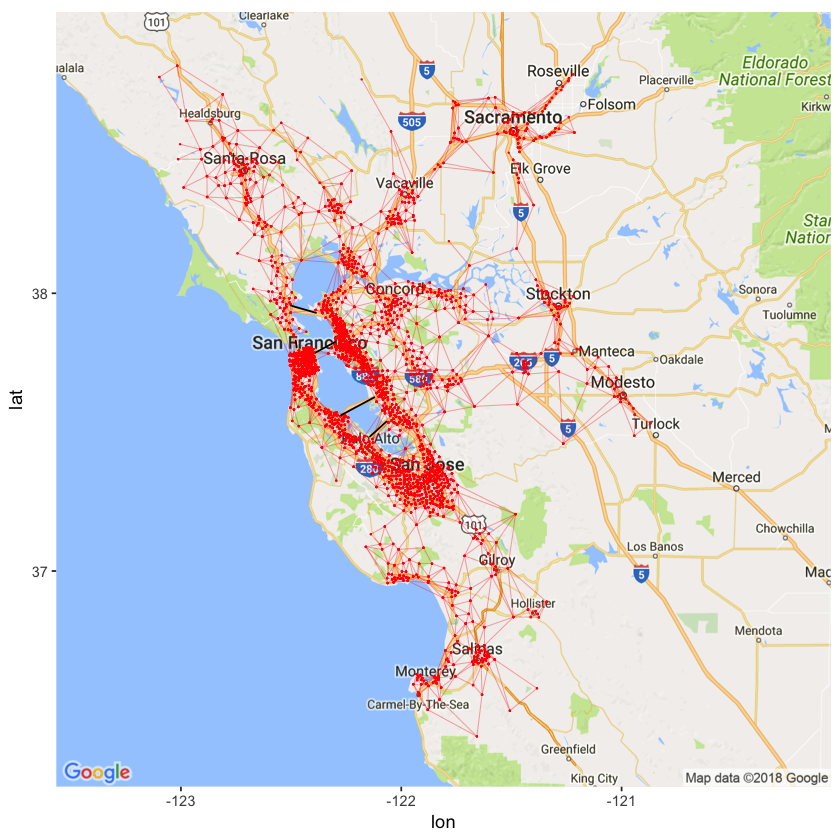

In [871]:
caliMap +
geom_point(data = plotGeodataDefoliatedDf, 
           mapping = aes(x = lonList, y = latList), 
           color = "red", size = 0.01) +
geom_path(data = plotGeodataDefoliatedDf,
    aes(x = lonList, y = latList, group = edgeIdList),  
    colour = "red", size = 0.1, alpha = 1.0, lineend = "round"
  ) + 
geom_path(data = plotBridgesDf,
    aes(x = bridgeLonList, y = bridgeLatList, group = bridgeEdgeIdList),  
    colour = "black", size = 0.5, alpha = 1.0, lineend = "round"
  )

In [ ]:
caliMapBridgesZoomed +
geom_point(data = plotGeodataDefoliatedDf, 
           mapping = aes(x = lonList, y = latList), 
           color = "red", size = 0.01) +
geom_path(data = plotGeodataDefoliatedDf,
    aes(x = lonList, y = latList, group = edgeIdList),  
    colour = "red", size = 0.1, alpha = 1.0, lineend = "round"
  ) + 
geom_path(data = plotBridgesDf,
    aes(x = bridgeLonList, y = bridgeLatList, group = bridgeEdgeIdList),  
    colour = "black", size = 0.5, alpha = 1.0, lineend = "round"
  )

Warning message:
“Removed 5131 rows containing missing values (geom_point).”Warning message:
“Removed 117 rows containing missing values (geom_path).”

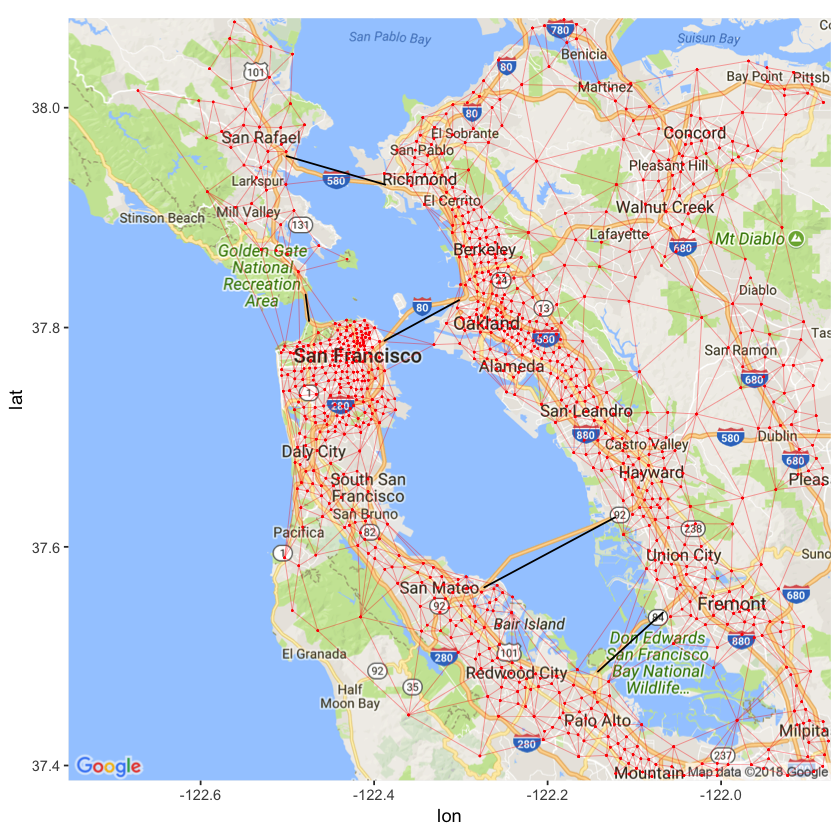

In [872]:
caliMapBridgesZoomed +
geom_point(data = plotGeodataDefoliatedDf, 
           mapping = aes(x = lonList, y = latList), 
           color = "red", size = 0.01) +
geom_path(data = plotGeodataDefoliatedDf,
    aes(x = lonList, y = latList, group = edgeIdList),  
    colour = "red", size = 0.1, alpha = 1.0, lineend = "round"
  ) + 
geom_path(data = plotBridgesDf,
    aes(x = bridgeLonList, y = bridgeLatList, group = bridgeEdgeIdList),  
    colour = "black", size = 0.5, alpha = 1.0, lineend = "round"
  )

#### METHOD 2 - BASED ON SPEED

In [804]:
flowGraphDefoliatedOnSpeed = induced_subgraph(flowGraph, V(flowGraph))
vcount(flowGraphDefoliatedOnSpeed)
ecount(flowGraphDefoliatedOnSpeed)
E(flowGraphDefoliatedOnSpeed)[[1]]

[1] 1880

[1] 5627

+ 1/5627 edge from ef4eb24 (vertex names):
  tail head tid  hid   weight capacity       speed
1  806 2073   1 1608 5893.175 3011.166 0.007670659

In [805]:
graphSize = ecount(flowGraphDefoliatedOnSpeed)
delCount = 0
delSeq = c()
for(ei in 1:graphSize){
    carSpeed = E(flowGraphDefoliatedOnSpeed)[[ei]]$speed
    # max speed in US 80mph = 0.0222 miles/sec
    # 65mph = 0.0181
    if(carSpeed > (meanSpeed + 2*stdSpeed)){ 
        sourceNodeName = head_of(flowGraph, E(flowGraph)[ei])$name
        destNodeName =  tail_of(flowGraph, E(flowGraph)[ei])$name
        delSeq = c(delSeq, ei)
        delCount = delCount + 1
    }
}
flowGraphDefoliatedOnSpeed = delete_edges(flowGraphDefoliatedOnSpeed, delSeq)

In [806]:
print(delCount)
vcount(flowGraphDefoliatedOnSpeed)
ecount(flowGraphDefoliatedOnSpeed)

[1] 246


[1] 1880

[1] 5381

In [807]:
plotGraph = flowGraphDefoliatedOnSpeed
edgeIdList = c()
nodeIdList = c()
latList = c()
lonList = c()
nEdges = ecount(plotGraph)
# nEdges = 1000
for(ei in 1:nEdges){
    sourceNodeName = head_of(plotGraph, E(plotGraph)[ei])$name
    destNodeName =  tail_of(plotGraph, E(plotGraph)[ei])$name
    
    edgeIdList = c(edgeIdList, ei, ei)
    nodeIdList = c(nodeIdList, sourceNodeName, destNodeName)
    latList = c(latList, getLat(sourceNodeName), getLat(destNodeName))
    lonList = c(lonList, getLon(sourceNodeName), getLon(destNodeName))
}
plotGeodataDefoliatedOnSpeedDf = data.frame(edgeIdList, nodeIdList, latList, lonList)
# plotGeodataDf
# E(flowGraph)[1:10]
nrow(plotGeodataDefoliatedOnSpeedDf)
ncol(plotGeodataDefoliatedOnSpeedDf)

[1] 10762

[1] 4

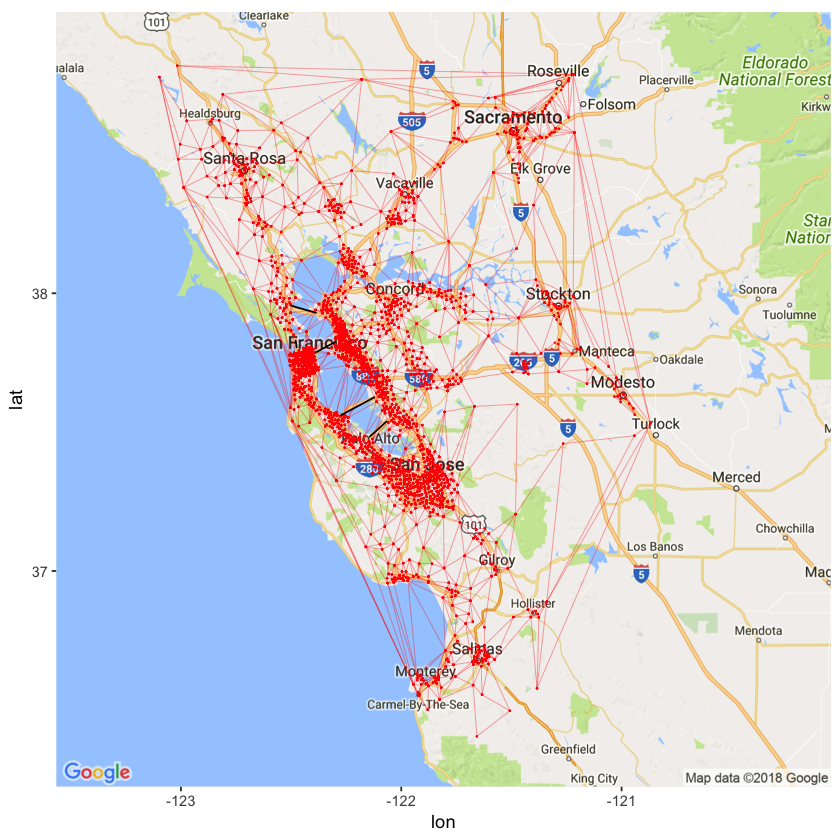

In [808]:
caliMap +
geom_point(data = plotGeodataDefoliatedOnSpeedDf, 
           mapping = aes(x = lonList, y = latList), 
           color = "red", size = 0.01) +
geom_path(data = plotGeodataDefoliatedOnSpeedDf,
    aes(x = lonList, y = latList, group = edgeIdList),  
    colour = "red", size = 0.1, alpha = 1.0, lineend = "round"
  ) + 
geom_path(data = plotBridgesDf,
    aes(x = bridgeLonList, y = bridgeLatList, group = bridgeEdgeIdList),  
    colour = "black", size = 0.5, alpha = 1.0, lineend = "round"
  )

### QUESTION 15

In [985]:
maxFlowRes2 = max_flow(flowGraphDefoliated, '2607', '1968')
maxFlowRes2$value

[1] 14747.97

In [986]:
edge_disjoint_paths(flowGraphDefoliated, '2607', '1968')

[1] 5

In [987]:
length(maxFlowRes2$flow)
length(maxFlowEdgeFlow)
ecount(flowGraphDefoliated)
vcount(flowGraphDefoliated)

[1] 5365

[1] 5365

[1] 5365

[1] 1880

In [977]:
maxFlowEdgeFlow = maxFlowRes2$flow

flowEdgeIdList = c()
flowNodeIdList = c()
flowLatList = c()
flowLonList = c()
nEdges = length(maxFlowEdgeFlow)
# nEdges = 1000
for(ei in 1:nEdges){
    if(maxFlowEdgeFlow[[ei]] != 0){
        sourceNodeName = head_of(flowGraphDefoliated, E(flowGraphDefoliated)[ei])$name
        destNodeName =  tail_of(flowGraphDefoliated, E(flowGraphDefoliated)[ei])$name

        flowEdgeIdList = c(flowEdgeIdList, ei, ei)
        flowNodeIdList = c(flowNodeIdList, sourceNodeName, destNodeName)
        flowLatList = c(flowLatList, getLat(sourceNodeName), getLat(destNodeName))
        flowLonList = c(flowLonList, getLon(sourceNodeName), getLon(destNodeName))
    }
}
plotFlowDf2 = data.frame(flowEdgeIdList, flowNodeIdList, flowLatList, flowLonList)
nrow(plotFlowDf2)

[1] 1010

Warning message:
“Removed 75 rows containing missing values (geom_path).”Warning message:
“Removed 5 rows containing missing values (geom_path).”

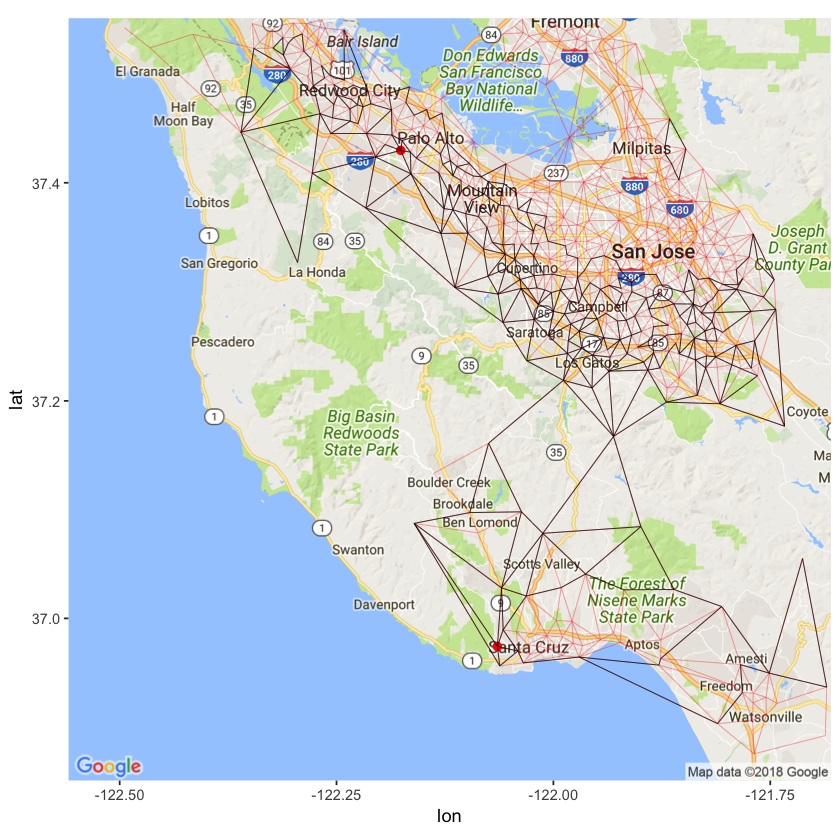

In [981]:
caliMapStanSanta +
geom_point(data = stanSantaDf, mapping = aes(x = stanSantaLonList, y = stanSantaLatList), color = "red", size = 2) +
geom_path(data = plotGeodataDefoliatedDf,
    aes(x = lonList, y = latList, group = edgeIdList),  colour = "red",
    size = 0.1, alpha = 1.0, lineend = "round"
          ) + 
geom_path(data = plotFlowDf2,
    aes(x = flowLonList, y = flowLatList, group = flowEdgeIdList),  colour = "black",
    size = 0.2, alpha = 1, lineend = "round"
          )

In [980]:
maxFlowRes3 = max_flow(uberNetwork, '2607', '1968', capacity = NULL)
maxFlowRes3$value

[1] 94

In [956]:
edge_disjoint_paths(uberNetwork, '2607', '1968')

[1] 94

In [951]:
vcount(uberNetwork)
ecount(uberNetwork)

[1] 1880

[1] 311802

#### Q11 - Road Mesh

#### Q14 - Road mesh plot